In [1]:
%matplotlib inline

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis
import time


# Statistics Exercise
## Statistical Distributions. Properties of distributions. Applications of Probability and Statistics in Computer Science

### Problem 1. Plotting a Single Distribution. Digits in $\pi$ and $e$
We expect that the decimal digits in $\pi$ and $e$ will be randomly distributed and there's no reason for any digit to dominate over others. Let's verify this.

Using an algorithm, the first 10 004 digits of $\pi$ and $e$ were generated:
$$
\pi = 3.(141592 \dots 5678)5667
$$
$$
e = 2.(718281 \dots 6788)5674
$$

The 10 000 digits in brackets were counted. You can see the results in `digits.dat`. Each column corresponds to one digit from 0 to 9. The first row is for $\pi$ and the second row is for $e$.

How are these digits distributed? Are the two distributions different?

**Note:** The dataset is **not properly formatted** to work easily. You can transpose it. Now, digit counts will be in rows and variables - in columns. 
```python
digits = pd.read_table("digits.dat", header = None).T
```

You can also specify column names like this:
```python
digits.columns = ["pi", "e"]
```

Also note that **we are not creating the histogram of the distribution**. We already have the counts, we need to plot them. In a sense, the histogram has already been calculated.

To do this, we can create a "bar chart" (using `plt.bar()`). We have to provide values for the x-axis and y-axis. For the x-axis, we have the numbers 0 through 9 (we can use the *index* of the dataset like this: `digits.index`). For the y-axis, we need to plot the digit counts directly.

We can see that even the simplest datasets sometimes need a bit of preprocessing. This is always the case when we're working with data.

In [3]:
digits = pd.read_table("digits.dat", header = None).T
digits.columns = ["pi", "e"]

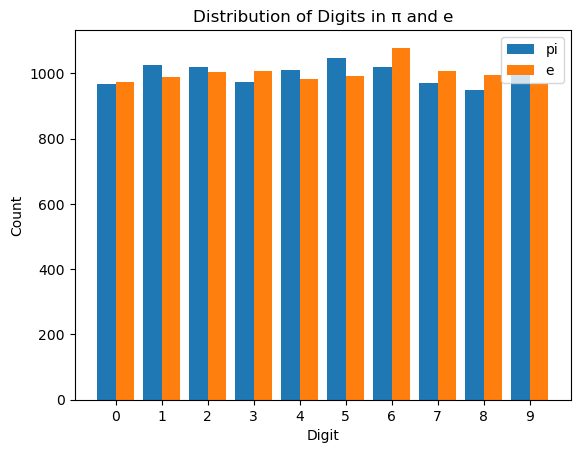

In [4]:
plt.bar(digits.index - 0.2, digits["pi"], width=0.4, label="pi")
plt.bar(digits.index + 0.2, digits["e"], width=0.4, label="e")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Distribution of Digits in π and e")
plt.xticks(digits.index)
plt.legend()
plt.show()

Let's try something else. Scientists have measured the percentage of silica ($\text{SiO}_2$, sand / glass) for 22 meteors. You can find it in `silica.dat`. How are these distributed? What is a "typical" percentage? Is there such percentage at all?

Print the mean, standard deviation (you can use the biased or unbiased formula), skewness and kurtosis of the distribution. What do these numbers tell you? How do they relateto the shape of the distribution? Can you characterize the distribution better? (An idea would be to characterize different parts of it on their own, as if they're different distributions.)

In [6]:

silica = pd.read_table("silica.dat", header=None, names=["SiO2"])
mean = silica["SiO2"].mean()
std = silica["SiO2"].std()  # Unbiased by default (ddof=1)
skewness = skew(silica["SiO2"])
kurt = kurtosis(silica["SiO2"])

print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std:.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")

Mean: 29.17
Standard Deviation: 4.29
Skewness: -0.42
Kurtosis: -0.99


### Problem 2. Categorical Variables. Comparing Categories
In addition to numeric variables (like age and salary), in statistics we also use **categorical variables**. These are descriptions of quality (as opposed to quantity). Such variables can be gender, smoker / non-smoker, results of a medical study (healthy / not healthy), colors (red, green, blue), etc. To plot values of categories, we use *bar charts*. Since category names can be long, it's sometimes useful to plot the lines horizontally.

<p style="color: #d9534f"><strong>There is a very significant difference between histograms and bar charts. Histograms are used to plot the frequency distribution of one numeric variable. Bar charts are used to plot categorical variables - how each value compares to other values.</strong></p>

The dataset `budget.dat` contains the figures for the eight main items in the US budget for 1978 and 1979 in billions
of dollars.

Display the two budgets separately. Use `xlabel()` (or `ylabel()` if your plot is horizontal) to write the names of each category. You can use [this](https://matplotlib.org/examples/pylab_examples/barchart_demo.html) and [this](https://matplotlib.org/examples/pylab_examples/barchart_demo2.html) examples as a guide.

Create another variable which shows the difference in budget $\Delta b = b_{1979} - b_{1978}$. Add this variable to the dataset (find out how). Plot it. How does the budget differ?

Since the numbers are different, a better comparison will be if we convert them to percentages of the total budget. Create two more variables for 1978 and 1979 and add them to the dataset. Plot these now. Also plot the difference in percentage, like you did before.

US Budget Dataset (in billions of dollars):
             Category   1978   1979
0   Military spending  107.6  117.8
1     Social security  103.9  115.1
2         Health care   44.3   49.7
3        Debt service   43.8   49.0
4             Welfare   43.7   44.9
5           Education   27.5   30.4
6              Energy   19.9   21.8
7  Veteran's benefits   18.9   19.3



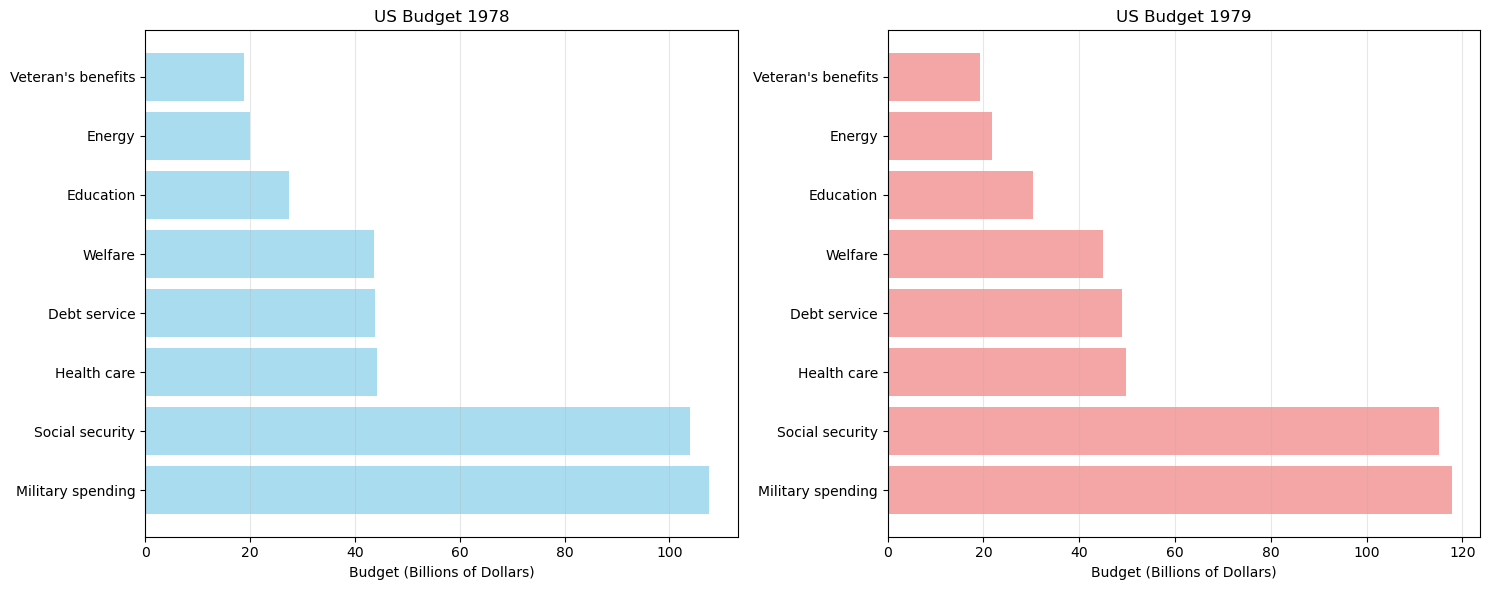

Dataset with budget difference:
             Category   1978   1979  Delta_Budget
0   Military spending  107.6  117.8          10.2
1     Social security  103.9  115.1          11.2
2         Health care   44.3   49.7           5.4
3        Debt service   43.8   49.0           5.2
4             Welfare   43.7   44.9           1.2
5           Education   27.5   30.4           2.9
6              Energy   19.9   21.8           1.9
7  Veteran's benefits   18.9   19.3           0.4



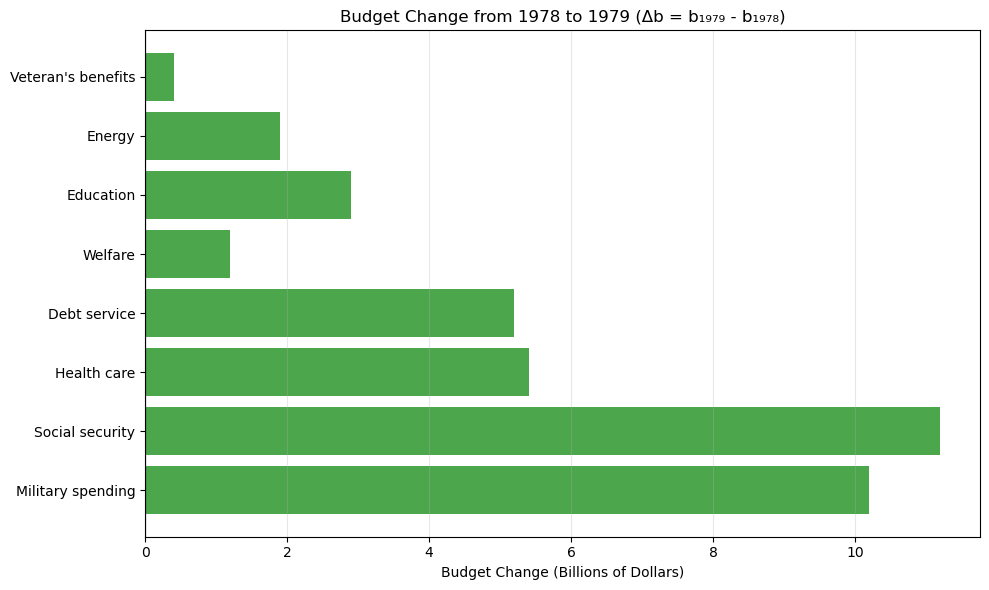

Budget Analysis:
Total 1978 Budget: $409.6 billion
Total 1979 Budget: $448.0 billion
Overall Budget Increase: $38.4 billion

Dataset with percentages:
             Category  Percentage_1978  Percentage_1979
0   Military spending            26.27            26.29
1     Social security            25.37            25.69
2         Health care            10.82            11.09
3        Debt service            10.69            10.94
4             Welfare            10.67            10.02
5           Education             6.71             6.79
6              Energy             4.86             4.87
7  Veteran's benefits             4.61             4.31



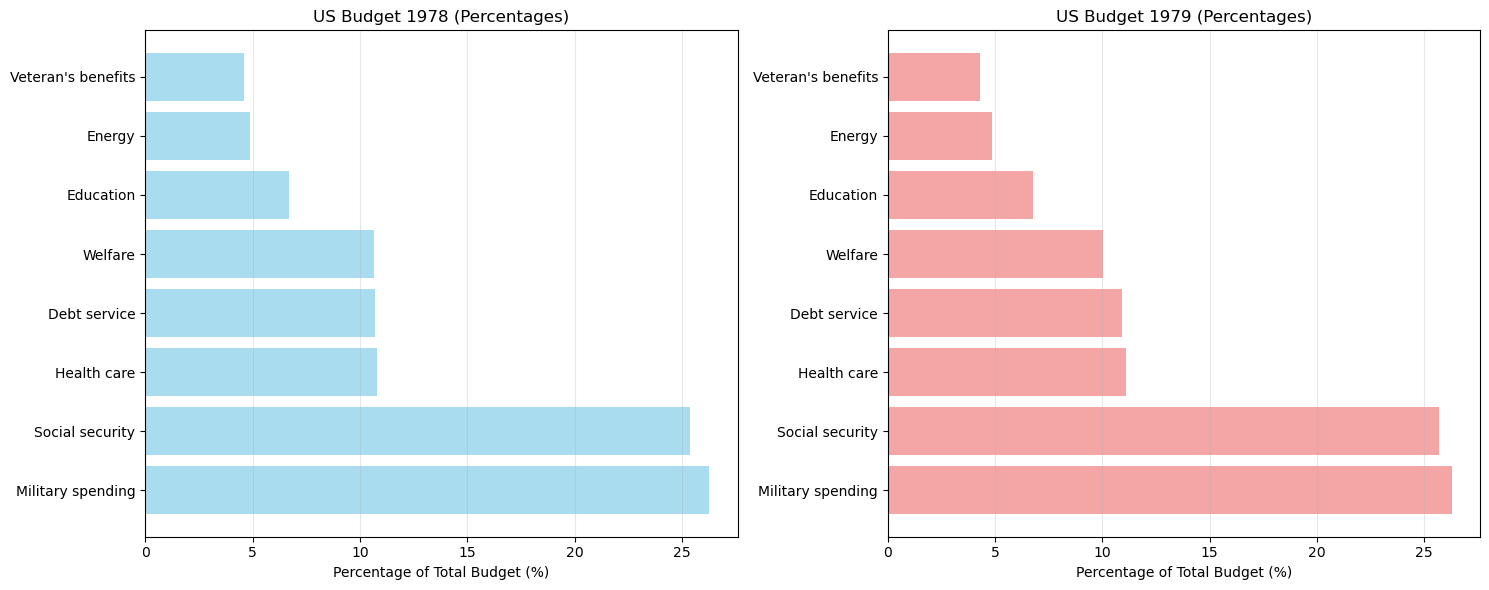

Dataset with percentage differences:
             Category  Percentage_1978  Percentage_1979  Delta_Percentage
0   Military spending            26.27            26.29              0.03
1     Social security            25.37            25.69              0.33
2         Health care            10.82            11.09              0.28
3        Debt service            10.69            10.94              0.24
4             Welfare            10.67            10.02             -0.65
5           Education             6.71             6.79              0.07
6              Energy             4.86             4.87              0.01
7  Veteran's benefits             4.61             4.31             -0.31



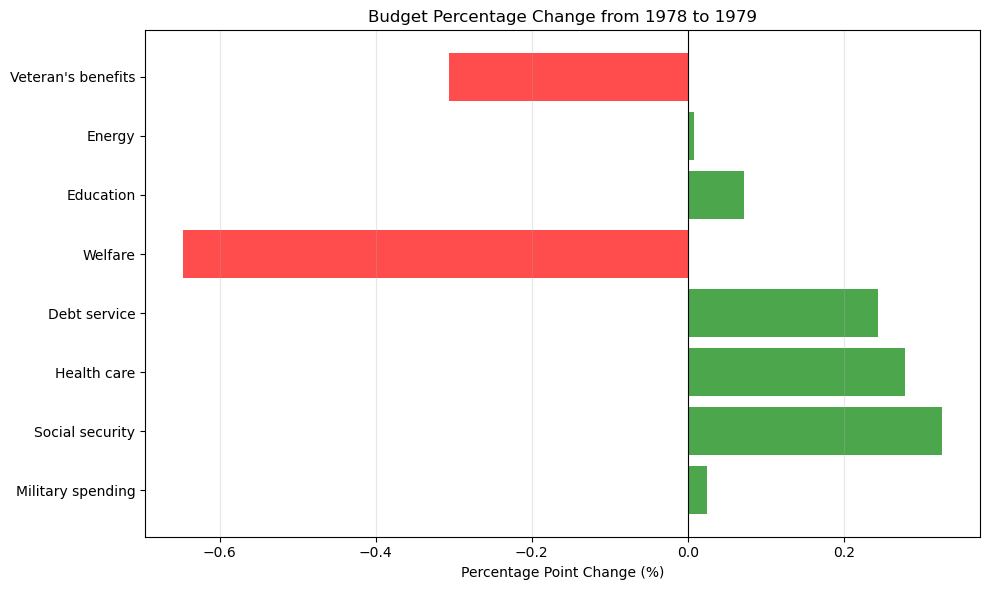

BUDGET ANALYSIS SUMMARY:

Absolute Changes (in billions):
- Military spending: increased by $10.2B
- Social security: increased by $11.2B
- Health care: increased by $5.4B
- Debt service: increased by $5.2B
- Welfare: increased by $1.2B
- Education: increased by $2.9B
- Energy: increased by $1.9B
- Veteran's benefits: increased by $0.4B

Percentage Point Changes:
- Military spending: increased by 0.03 percentage points
- Social security: increased by 0.33 percentage points
- Health care: increased by 0.28 percentage points
- Debt service: increased by 0.24 percentage points
- Welfare: decreased by 0.65 percentage points
- Education: increased by 0.07 percentage points
- Energy: increased by 0.01 percentage points
- Veteran's benefits: decreased by 0.31 percentage points

Key Insights:
- Largest absolute increase: Social security (+$11.2B)
- Largest percentage point increase: Social security (+0.33%)

Final Dataset:
             Category   1978   1979  Delta_Budget  Percentage_1978  \
0

In [ ]:
# Read the budget data
df = pd.read_table("budget.dat")  

# Display the dataset
print("US Budget Dataset (in billions of dollars):")
print(df)
print()

# 1. Display the two budgets separately
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1978 Budget
ax1.barh(df['Category'], df['1978'], color='skyblue', alpha=0.7)
ax1.set_xlabel('Budget (Billions of Dollars)')
ax1.set_title('US Budget 1978')
ax1.grid(axis='x', alpha=0.3)

# 1979 Budget
ax2.barh(df['Category'], df['1979'], color='lightcoral', alpha=0.7)
ax2.set_xlabel('Budget (Billions of Dollars)')
ax2.set_title('US Budget 1979')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Create difference variable and add to dataset
df['Delta_Budget'] = df['1979'] - df['1978']

print("Dataset with budget difference:")
print(df[['Category', '1978', '1979', 'Delta_Budget']])
print()

# Plot the budget difference
plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in df['Delta_Budget']]
plt.barh(df['Category'], df['Delta_Budget'], color=colors, alpha=0.7)
plt.xlabel('Budget Change (Billions of Dollars)')
plt.title('Budget Change from 1978 to 1979 (Δb = b₁₉₇₉ - b₁₉₇₈)')
plt.grid(axis='x', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()
plt.show()

print("Budget Analysis:")
print(f"Total 1978 Budget: ${df['1978'].sum():.1f} billion")
print(f"Total 1979 Budget: ${df['1979'].sum():.1f} billion")
print(f"Overall Budget Increase: ${df['Delta_Budget'].sum():.1f} billion")
print()

# 3. Convert to percentages of total budget
total_1978 = df['1978'].sum()
total_1979 = df['1979'].sum()

df['Percentage_1978'] = (df['1978'] / total_1978) * 100
df['Percentage_1979'] = (df['1979'] / total_1979) * 100

print("Dataset with percentages:")
print(df[['Category', 'Percentage_1978', 'Percentage_1979']].round(2))
print()

# Plot percentage budgets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1978 Percentage Budget
ax1.barh(df['Category'], df['Percentage_1978'], color='skyblue', alpha=0.7)
ax1.set_xlabel('Percentage of Total Budget (%)')
ax1.set_title('US Budget 1978 (Percentages)')
ax1.grid(axis='x', alpha=0.3)

# 1979 Percentage Budget
ax2.barh(df['Category'], df['Percentage_1979'], color='lightcoral', alpha=0.7)
ax2.set_xlabel('Percentage of Total Budget (%)')
ax2.set_title('US Budget 1979 (Percentages)')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Calculate and plot percentage difference
df['Delta_Percentage'] = df['Percentage_1979'] - df['Percentage_1978']

print("Dataset with percentage differences:")
print(df[['Category', 'Percentage_1978', 'Percentage_1979', 'Delta_Percentage']].round(2))
print()

# Plot percentage difference
plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in df['Delta_Percentage']]
plt.barh(df['Category'], df['Delta_Percentage'], color=colors, alpha=0.7)
plt.xlabel('Percentage Point Change (%)')
plt.title('Budget Percentage Change from 1978 to 1979')
plt.grid(axis='x', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()
plt.show()

# 5. Summary analysis
print("BUDGET ANALYSIS SUMMARY:")
print("=" * 50)
print("\nAbsolute Changes (in billions):")
for i, row in df.iterrows():
    change = row['Delta_Budget']
    direction = "increased" if change > 0 else "decreased"
    print(f"- {row['Category']}: {direction} by ${abs(change):.1f}B")

print("\nPercentage Point Changes:")
for i, row in df.iterrows():
    change = row['Delta_Percentage']
    direction = "increased" if change > 0 else "decreased"
    print(f"- {row['Category']}: {direction} by {abs(change):.2f} percentage points")

print(f"\nKey Insights:")
print(f"- Largest absolute increase: {df.loc[df['Delta_Budget'].idxmax(), 'Category']} (+${df['Delta_Budget'].max():.1f}B)")
print(f"- Largest percentage point increase: {df.loc[df['Delta_Percentage'].idxmax(), 'Category']} (+{df['Delta_Percentage'].max():.2f}%)")

# Display final dataset
print("\nFinal Dataset:")
print(df.round(2))

### Problem 3. Correlations between Variables. Alcohol and Tobacco Usage
The dataset `alcohol_tobacco.dat` shows the average weekly household spending, in British pounds, on tobacco products and alcoholic beverages for each of the 11 regions of Great Britain.

Create a scatter plot. Print the correlation coefficient. You can use the **correlation matrix** (find out how).

There's a major outlier. Which one is it?

Remove the outlier from the dataset (find out how). Calculate the correlation coefficient once again. It should be much higher.

This example is useful to show what an outlier is, and how an outlier can influence the results of an experiment.

**Note:** Be careful with outliers. Sometimes they indicate human error (e.g. human height 1588 cm is obviously wrong) but sometimes they indicate important patterns in the data. Should you remove, replace, or leave them is a difficult question and should be answered separately for each dataset.

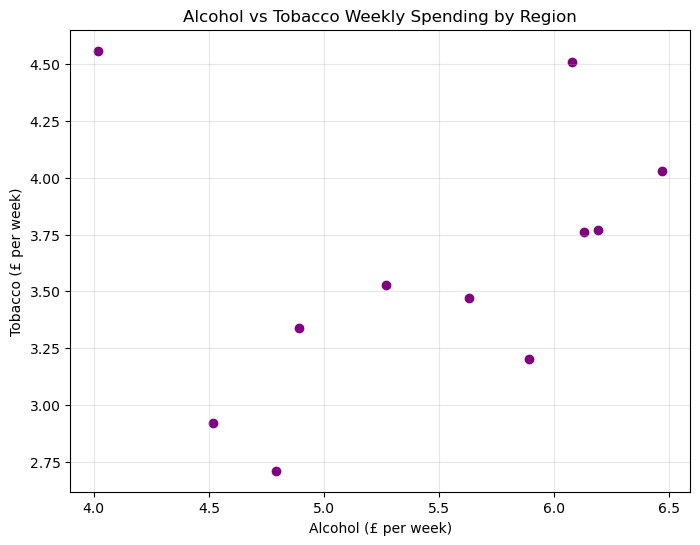

Correlation matrix:
           Alcohol   Tobacco
Alcohol  1.000000  0.223572
Tobacco  0.223572  1.000000
Correlation coefficient: 0.22
Outlier region: Northern Ireland (Tobacco: 4.56)

After removing outlier:
Correlation matrix:
           Alcohol   Tobacco
Alcohol  1.000000  0.784287
Tobacco  0.784287  1.000000
Correlation coefficient: 0.78


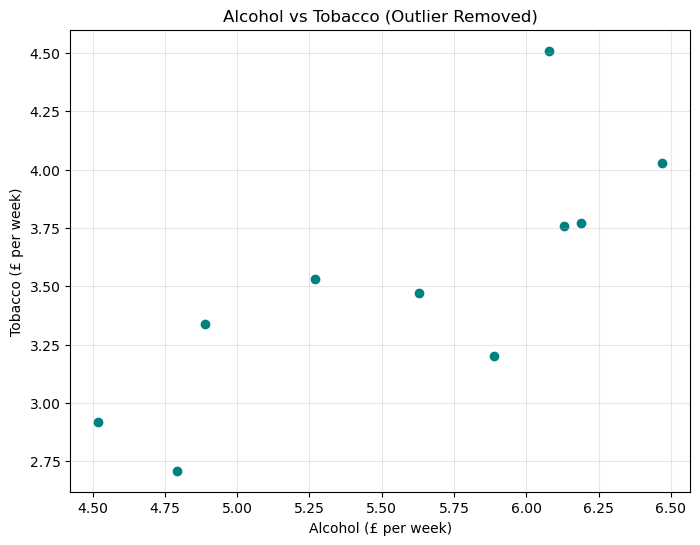

In [13]:
# Read the alcohol and tobacco data
alco_tob = pd.read_table("alcohol_tobacco.dat")

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(alco_tob["Alcohol"], alco_tob["Tobacco"], color="purple")
plt.xlabel("Alcohol (£ per week)")
plt.ylabel("Tobacco (£ per week)")
plt.title("Alcohol vs Tobacco Weekly Spending by Region")
plt.grid(alpha=0.3)
plt.show()

# Correlation matrix
corr_matrix = alco_tob[["Alcohol", "Tobacco"]].corr()
print("Correlation matrix:\n", corr_matrix)
print(f"Correlation coefficient: {corr_matrix.loc['Alcohol', 'Tobacco']:.2f}")

# Identify the outlier
outlier_idx = alco_tob["Tobacco"].idxmax()
print(f"Outlier region: {alco_tob.loc[outlier_idx, 'Region']} (Tobacco: {alco_tob.loc[outlier_idx, 'Tobacco']})")

# Remove the outlier and recalculate correlation
alco_tob_no_outlier = alco_tob.drop(outlier_idx)
corr_matrix_no_outlier = alco_tob_no_outlier[["Alcohol", "Tobacco"]].corr()
print("\nAfter removing outlier:")
print("Correlation matrix:\n", corr_matrix_no_outlier)
print(f"Correlation coefficient: {corr_matrix_no_outlier.loc['Alcohol', 'Tobacco']:.2f}")

# Scatter plot without outlier
plt.figure(figsize=(8, 6))
plt.scatter(alco_tob_no_outlier["Alcohol"], alco_tob_no_outlier["Tobacco"], color="teal")
plt.xlabel("Alcohol (£ per week)")
plt.ylabel("Tobacco (£ per week)")
plt.title("Alcohol vs Tobacco (Outlier Removed)")
plt.grid(alpha=0.3)
plt.show()

### Problem 4. Simulation
Another prediction technique based on statistics, is simulation. This means recreating a system's parameters and running the experiment on a computer instead of running it in real life. Simulation can give us many insights. It's useful for prediction, "what-if" analysis, etc. It's also very useful if we have very limited "real experimentation" resources and want to narrow down our possibilities.

Let's see how we can simulate the profit of a grocery shop.

The profit is dependent on the customers and what items they buy. Let's assume that the number of customers per months follows a normal distribution with mean 500 and standard deviation 20.

$$ C \sim N(500, 20) $$

In the shop, there are several items, each having a different popularity. The popularity represents the probability of buying each item.

| Item               | Price | Popularity |
|--------------------|-------|------------|
| Bread              | 0.99  | 0.5        |
| Milk               | 2.89  | 0.15       |
| Eggs, dozen        | 2.00  | 0.2        |
| Chicken fillet, kg | 6.39  | 0.15       |

Each customer buys *exactly one* article at random. Each customer will generate an expected profit equal to $\text{price} . \text{popularity}$. Total profit: sum of all profits.

In [14]:
def get_customer_profit():
    n = np.random.random()
    if n <= 0.5:
        return 0.99
    elif n < 0.65:
        return 2.89
    elif n <= 0.85:
        return 2
    else:
        return 6.39

In [15]:
days = 1000
def run_simulation():
    profits = []
    for day in range(days):
        customers = np.floor(np.random.normal(500, 20))
        profit = sum([get_customer_profit() for c in np.arange(customers)])
        profits.append(profit)
    return profits

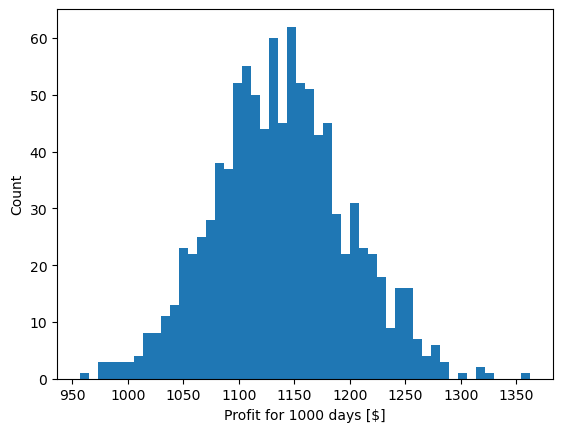

In [16]:
profits = run_simulation()
plt.hist(profits, bins = 50)
plt.xlabel("Profit for " + str(days) + " days [$]")
plt.ylabel("Count")
plt.show()

Now we can answer questions like:
* What's the probability of profit less than \$1100? 
* What's the probability of profit between \$1300 and \$1400?

We can also change our model. Let's suppose now that one customer can take 1, 2 or 3 items, with probabilities 0.5, 0.3 and 0.2 respectively. The picked items are independent. How does this change the distribution?

In [17]:
def get_customer_profit_many_items(items = 1):
    customer_sum = sum([get_customer_profit() for i in range(items)])
    return customer_sum

def get_total_customer_profit():
    n = np.random.random()
    if n <= 0.5:
        return get_customer_profit_many_items(1)
    elif n <= 0.8:
        return get_customer_profit_many_items(2)
    else:
        return get_customer_profit_many_items(3)

In [18]:
def run_simulation_many_items():
    days = 1000
    profits_many_items = []
    for day in range(days):
        customers = np.floor(np.random.normal(500, 20))
        profit = sum([get_total_customer_profit() for c in np.arange(customers)])
        profits_many_items.append(profit)
    return profits_many_items

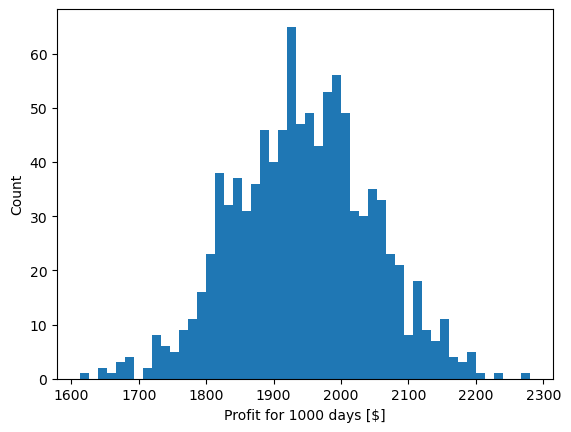

In [19]:
profits_many_items = run_simulation_many_items()
plt.hist(profits_many_items, bins = 50)
plt.xlabel("Profit for " + str(days) + " days [$]")
plt.ylabel("Count")
plt.show()

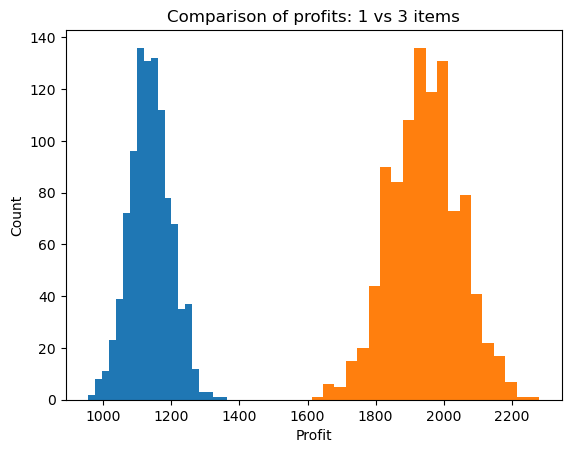

In [20]:
plt.title("Comparison of profits: 1 vs 3 items")
plt.hist(profits, bins = 20)
plt.hist(profits_many_items, bins = 20)
plt.xlabel("Profit")
plt.ylabel("Count")
plt.show()

### ** Problem 5. Monte Carlo Simulation
One common technique to apply simulations is called **Monte Carlo simulation**. It's similar to the simulation from the previous example. The main idea is to use random sampling to solve deterministic problems.

Research what these simulations are. Give examples. Implement at least one case of a Monte Carlo simulation. You can use the following checklist to help with your research and work:
* What is a simulation?
    * How is simulation used in science?
    * Why is a simulation useful?
* How are statistics useful in simulation? How can we simulate unknown, random processes?
* What is a Monte Carlo simulation (also known as "Monte Carlo method")?
* A common use of Monte Carlo methods is numeric integration
    * Define the problem. Propose the solution. Implement it and test with some common functions
    * How does this method compare to other methods, e.g. the trapezoidal rule? Compare the performance (accuracy and time to execute) of both methods
* Apply Monte Carlo simulation to a real-life system. There are many examples. You can see [Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method#Applications) or some other resource for inspiration.

In [23]:

# Example: Monte Carlo integration to estimate the area under f(x) = x^2 on [0, 1]

def f(x):
    return x ** 2

# Monte Carlo integration
def monte_carlo_integration(f, a, b, n_samples=100000):
    samples = np.random.uniform(a, b, n_samples)
    values = f(samples)
    return (b - a) * np.mean(values)

# Trapezoidal rule integration
def trapezoidal_rule(f, a, b, n_intervals=1000):
    x = np.linspace(a, b, n_intervals + 1)
    y = f(x)
    dx = (b - a) / n_intervals
    return (dx / 2) * np.sum(y[:-1] + y[1:])

# True value for comparison
true_value = 1/3

# Monte Carlo
start = time.time()
mc_result = monte_carlo_integration(f, 0, 1, n_samples=100000)
mc_time = time.time() - start

# Trapezoidal
start = time.time()
trap_result = trapezoidal_rule(f, 0, 1, n_intervals=1000)
trap_time = time.time() - start

print(f"True value: {true_value:.6f}")
print(f"Monte Carlo estimate: {mc_result:.6f} (error: {abs(mc_result - true_value):.6f}, time: {mc_time:.4f}s)")
print(f"Trapezoidal rule:    {trap_result:.6f} (error: {abs(trap_result - true_value):.6f}, time: {trap_time:.4f}s)")

True value: 0.333333
Monte Carlo estimate: 0.332035 (error: 0.001298, time: 0.0020s)
Trapezoidal rule:    0.333334 (error: 0.000000, time: 0.0000s)


### ** Problem 6. Probabilistic Data Structures
A very interesting application of probability in computer science is a kind of data structures which have a probabilistic behaviour. Examples of these are **Bloom filter**, **Skip list**, **Count-min sketch** and **HyperLogLog**.

Research how one of these structures works. Or write about many of them, if you wish. You can use the following checklist as a guide:
* What is a data structure? 
* What is a probabilistic data structure?
    * Where does the probabilistic behaviour emerge?
    * What advantages do these structures provide?
* For your chosen structure, how is it constructed?
    * What parts do you need? What are the details?
* How does the structure work?
    * What operations can you do?
    * What are the typical probabilities associated with these operations?
* Analyze the structure
    * Analyze the runtimes for all operations
    * Analyze the space usage
    * Compare to a similar, non-probabilistic data structure
    * What advantages does the new data structure have? What drawbacks do you need to be aware of?
* Give at least one example where this structure is useful
    * E.g. Bloom filter - spell checkers
    * Analyze the use case
    * If possible, implement the use case
    * Display some metrics (e.g. % conserved space, % reduced time)